In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install geomstats
!pip install torch
!pip install icecream

In [3]:
# Set pytorch backend
import os
# os.environ["GEOMSTATS_BACKEND"] = "pytorch"
os.environ["GEOMSTATS_BACKEND"] = "numpy"

NDIM = 2

In [4]:
import sys
sys.path.append("/home/phil/mixture_embeddings/notebooks/pac")
from util import mixture_embedding
sys.path.append("/home/phil/mixture_embeddings")
from src.embeddings.mixture_embeddings import get_mixture_embeddings

INFO: Using numpy backend


In [5]:
import anndata
adata = anndata.read_h5ad("data/big_table.h5ad")
adata.X /= adata.X.sum(axis=1) # normalize
adata

AnnData object with n_obs × n_vars = 32608 × 37215
    obs: 'acid_reflux', 'acne_medication', 'acne_medication_otc', 'add_adhd', 'age_cat', 'age_years', 'alcohol_consumption', 'alcohol_frequency', 'alcohol_types_beercider', 'alcohol_types_red_wine', 'alcohol_types_sour_beers', 'alcohol_types_spiritshard_alcohol', 'alcohol_types_unspecified', 'alcohol_types_white_wine', 'allergic_to_i_have_no_food_allergies_that_i_know_of', 'allergic_to_peanuts', 'allergic_to_shellfish', 'allergic_to_tree_nuts', 'allergic_to_unspecified', 'alzheimers', 'animal_age', 'animal_free_text', 'animal_gender', 'animal_origin', 'animal_type', 'animal_type_free_text', 'anonymized_name', 'antibiotic_history', 'appendix_removed', 'artificial_gi_disorder_types_constipation', 'artificial_gi_disorder_types_diarrhea', 'artificial_gi_disorder_types_soft_stools', 'artificial_gi_disorder_types_stomachache', 'artificial_gi_disorder_types_unspecified', 'artificial_gi_disorders', 'artificial_sweeteners', 'artificial_sweetene

In [6]:
# Truncate

# adata.X = adata.X.tocsr()
# adata = adata[:1000]

In [7]:
# Verify normalization
adata.to_df().iloc[:10].sum(axis=1)

10317.X00179385    1.0
10317.X00179004    1.0
10317.X00179030    1.0
10317.X00179108    1.0
10317.X00179203    1.0
10317.X00179272    1.0
10317.X00179366    1.0
10317.X00179612    1.0
10317.X00185459    1.0
10317.X00185470    1.0
dtype: float32

In [8]:
# Euclidean 2-D:

import pandas as pd

otu_embeddings = pd.read_csv("/data/phil/otu_embeddings/embeddings_euclidean_2.csv", dtype={0: str})
otu_embeddings = otu_embeddings.set_index(otu_embeddings.columns[0])

me = mixture_embedding(
    otu_table=adata.to_df(),
    otu_embeddings=otu_embeddings,
    geometry="euclidean",
)

adata_df = adata.to_df(),

# me = get_mixture_embeddings(
#     otu_table_df=adata_df[0],
#     otu_embeddings_df=otu_embeddings.loc[adata_df[0].columns],
#     space="euclidean",
#     embedding_size=2,
#     model=None,
#     mode=None,
#     return_percent_converged=False,
# )

# Add to adata
adata.obsm["e2"] = me.values

In [9]:
# PCA 2-D:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(adata.X.toarray())

adata.obsm["pca2"] = pca_embedding

In [10]:
# Hyperbolic 2-D:

otu_embeddings = pd.read_csv("/data/phil/otu_embeddings/embeddings_hyperbolic_2.csv", dtype={0: str})
otu_embeddings = otu_embeddings.set_index(otu_embeddings.columns[0])

me = mixture_embedding(
    otu_table=adata.to_df(),
    otu_embeddings=otu_embeddings,
    geometry="hyperbolic",
    hyperboloid=False,
    use_torch=False,
    n_jobs=11,
    max_iter=100
)

# me = get_mixture_embeddings(
#     otu_table_df=adata_df[0],
#     otu_embeddings_df=otu_embeddings.loc[adata_df[0].columns],
#     space="hyperbolic",
#     embedding_size=2,
#     model="poincare",
#     mode="geomstats",
#     return_percent_converged=False,
# )

# Add to adata
adata.obsm["h2"] = me

  0%|          | 11/32608 [00:00<40:39, 13.36it/s] INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
  5%|▌         | 1749/32608 [04:53<1:33:35,  5.49it/s]WARNING: Maximum number of iterations 100 reached. The mean may be inaccurate


In [ ]:
adata

NameError: name 'adata' is not defined

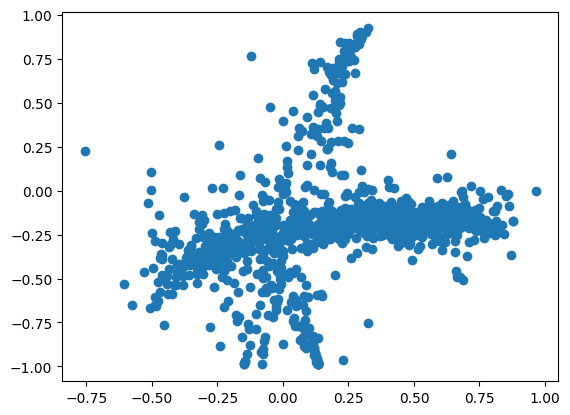

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(
    adata.obsm['h2'][:,0],
    adata.obsm['h2'][:,1],
)

In [ ]:
# Save table - make sure keys are str
# for key in adata.obsm.keys():
#     adata.obsm[key].columns = adata.obsm[key].columns.astype(str)

adata.write_h5ad("data/big_table_with_embeddings.h5ad")

In [ ]:
adata.obsm["e2"]

array([[ 0.00521359,  0.41989954],
       [ 0.03409757,  0.43600966],
       [ 0.02069398,  0.44420384],
       ...,
       [ 0.00161833,  0.40653293],
       [ 0.00177716,  0.39959474],
       [-0.01072011,  0.41371801]])